## Diabetics Prediction Using SVM Algorithm

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Load csv file

In [4]:
data_set = pd.read_csv('C:/Users/DELL/Downloads/diabetes.csv')


#### Observe the dataset

In [5]:
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Create X and Y data

In [22]:
X = data_set.drop('Outcome', axis=1)
Y = data_set['Outcome']

#### Split Data into Train and Test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)


## Without Standarlization

#### Initialize SVM 

In [9]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')    

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

#### Accuracies

In [18]:
print('Train Score: ', classifier.score(X_train, Y_train))
print('Test Score: ', classifier.score(X_test, Y_test))

Train Score:  0.7654723127035831
Test Score:  0.8181818181818182


## Data Preparation for SVM Model

In this section, we will create a second DataFrame specifically for evaluating the performance of the Support Vector Machine (SVM) model under standardized data conditions. 

This process helps to avoid any feature dominating the model due to its scale and allows the SVM to perform better in finding the optimal hyperplane.

Let's proceed with the data standardization and model evaluation.

In [40]:
X2 = data_set.drop('Outcome', axis=1)
Y2 = data_set['Outcome']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X2)
X2 = scaler.transform(X2)
X2

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### Split Data into Train and Test

In [43]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=0, test_size=0.2)

classifier2 = svm.SVC(kernel='linear')
classifier2.fit(X2_train, Y2_train)

SVC(kernel='linear')

#### Accuracy Values

In [44]:
print('Train accuracy: ', classifier2.score(X2_train, Y2_train))
print('Test accuracy: ', classifier2.score(X2_test, Y2_test))

Train accuracy:  0.7638436482084691
Test accuracy:  0.8246753246753247


#### Test model by gving random data. Here it shas been given 8 features to create a test data.

In [45]:
input_data = (4,110,92,0,0,37.6,0.191,30)

input_data_array = np.array(input_data).reshape(1, -1)

# Transform input_data using StandardScaler
input_data_scaled = scaler.transform(input_data_array)

print('Input data scaled: ', input_data_scaled)

Input data scaled:  [[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
prediction = classifier2.predict(input_data_scaled)
print(prediction)

[0]


In [54]:
if (prediction[0]==0):
  print('The person is not diabetic')

else:
  print('The person is diabetic')

The person is not diabetic


# Create a new data frame for decision tree, random forest Algorithms

In [55]:
data_set1 = pd.read_csv('C:/Users/DELL/Downloads/diabetes.csv')
data_set1.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [56]:
X1 = data_set1.drop('Outcome', axis=1)
Y1 = data_set1['Outcome']

print(X1.shape, Y1.shape)

(768, 8) (768,)


#### Split data into train and test

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=45)

print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(614, 8) (154, 8) (614,) (154,)


### Decision Tree Algorithm

In [60]:
from sklearn.tree import DecisionTreeClassifier

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

### Accuracy varition with different min_sample_split of Decision Tree

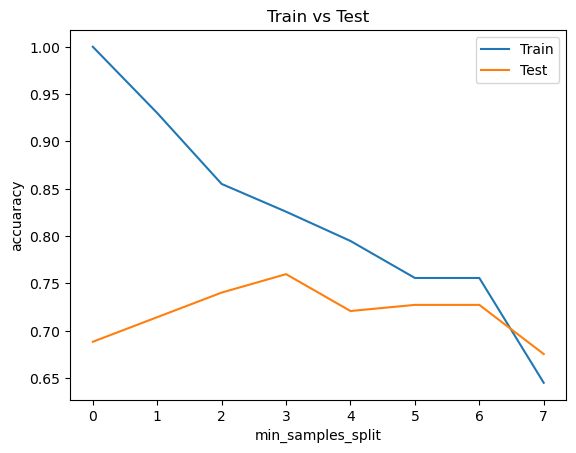

In [61]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=45).fit(x1_train, y1_train)
    train_prediction = model.predict(x1_train)
    test_prediction = model.predict(x1_test)
    train_accuracy = accuracy_score(train_prediction, y1_train)
    test_accuracy = accuracy_score(test_prediction, y1_test)
    accuracy_list_train.append(train_accuracy)
    accuracy_list_test.append(test_accuracy)

plt.title('Train vs Test')
plt.xlabel('min_samples_split')
plt.ylabel('accuaracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

### Accuracy varition with different max_depth of Decision Tree

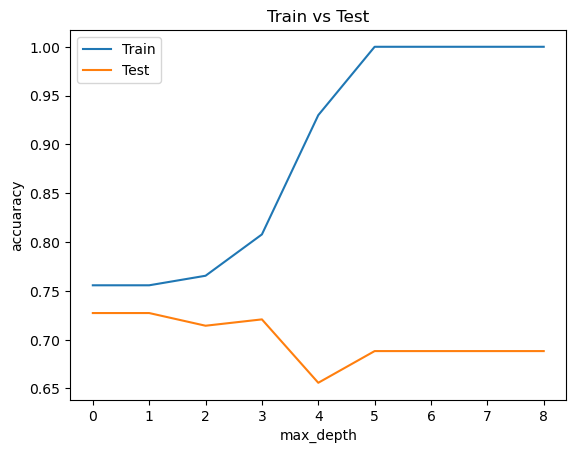

In [62]:
accuracy_list_train = []
accuracy_list_test = []

for max_depths in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=45).fit(x1_train, y1_train)
    train_prediction = model.predict(x1_train)
    test_prediction = model.predict(x1_test)
    train_accuracy = accuracy_score(train_prediction, y1_train)
    test_accuracy = accuracy_score(test_prediction, y1_test)
    accuracy_list_train.append(train_accuracy)
    accuracy_list_test.append(test_accuracy)

plt.title('Train vs Test')
plt.xlabel('max_depth')
plt.ylabel('accuaracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

### Create Dicision tree model.

##### Here the desision tree model is defined by observing the above two graphs and select optimum hyper paramerter values (max_depth and min_samples_split) 

In [63]:
decision_tree_model = DecisionTreeClassifier(max_depth=1, min_samples_split=6, random_state=45).fit(x1_train, y1_train)

In [64]:
print(accuracy_score(decision_tree_model.predict(x1_train), y1_train))
print(accuracy_score(decision_tree_model.predict(x1_test), y1_test))

0.755700325732899
0.7272727272727273


### RandomForest Algorithm

In [65]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

In [67]:
from sklearn.ensemble import RandomForestClassifier

### Accuracy varition with different min_sample_split of Random Forest 

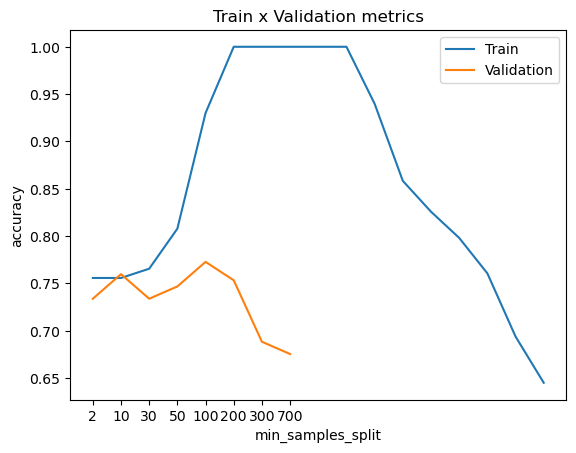

In [68]:
ccuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 45).fit(x1_train,y1_train) 
    predictions_train = model.predict(x1_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x1_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y1_train)
    accuracy_val = accuracy_score(predictions_val,y1_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Accuracy varition with different max_depth of Random Forest

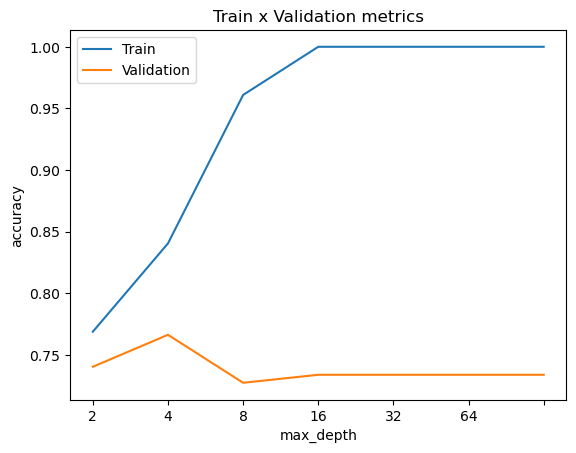

In [69]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 45).fit(x1_train,y1_train) 
    predictions_train = model.predict(x1_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x1_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y1_train)
    accuracy_val = accuracy_score(predictions_val,y1_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Accuracy varition with different n_estimators of Random Forest

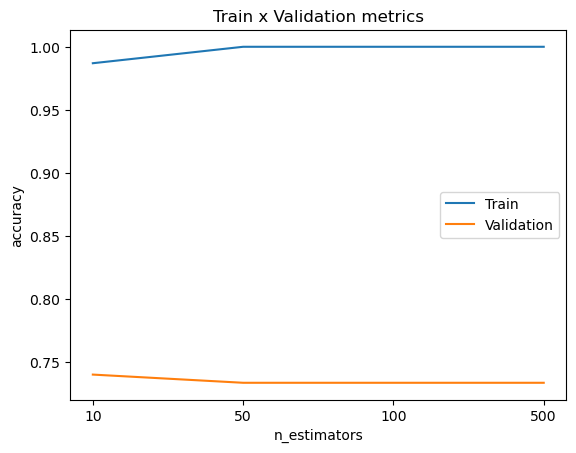

In [70]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 45).fit(x1_train,y1_train) 
    predictions_train = model.predict(x1_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x1_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y1_train)
    accuracy_val = accuracy_score(predictions_val,y1_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Create Random Forest Classifier model.

##### Here the Forest Classifier model is defined by observing the above three graphs and select optimum hyper paramerter values (max_depth and min_samples_split and n_estimators) 

In [71]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 4, 
                                             min_samples_split = 10).fit(x1_train,y1_train)

In [72]:
print(accuracy_score(random_forest_model.predict(x1_train), y1_train))
print(accuracy_score(random_forest_model.predict(x1_test), y1_test))

0.8273615635179153
0.7662337662337663
